Порядковый номер рассматриваемого контура: 0
Введите знак контура
1 - внешний, -1 - внутренний, znak=1
Введите количество вершин контура n=4
Порядковый номер рассматриваемого контура: 1
Введите знак контура
1 - внешний, -1 - внутренний, znak=-1
Введите количество вершин контура n=4
Рассматриваемый контур k= 0
Введите координаты абсцисс точек контура 
 x=0,5,4,1
Введите координаты ординат точек контура 
 y=0,1,5,4
Рассматриваемый контур k= 1
Введите координаты абсцисс точек контура 
 x=2,4,3,2
Введите координаты ординат точек контура 
 y=1,2,4,3
Общая площадь сечения, F = 16.5312
Статические моменты инерции сечения:
- относительно оси X, Sx = 44.1054
- относительно оси Y, Sy = 46.8936
Осевые моменты инерции сечения:
- относительно оси X, Jx = 154.0583
- относительно оси Y, Jy = 170.6739
Центробежный момент инерции сечения Jxy = 134.1634


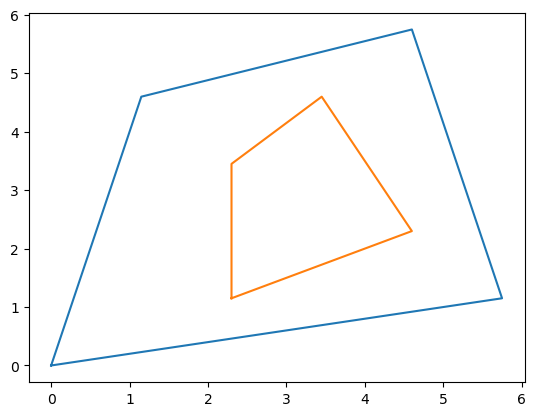

In [76]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

g = 3
s = 12
h = 1 + (g+s)/100
m = 2
n = []
znak = []
for k in range(m):
    print('Порядковый номер рассматриваемого контура:', k)
    print('Введите знак контура')
    znak.append(int(input('1 - внешний, -1 - внутренний, znak=')))
    n.append(int(input('Введите количество вершин контура n=')))
nmax = max(n)

x = np.zeros((m,nmax+2))
y = np.zeros((m,nmax+2))
xx = np.zeros((m,nmax+1))
yy = np.zeros((m,nmax+1))

for k in range(m):
    print('Рассматриваемый контур k=', k)
    x_t =  list(map(int, input('Введите координаты абсцисс точек контура \n x=').split(",")))
    y_t =  list(map(int, input('Введите координаты ординат точек контура \n y=').split(",")))
    x[k, 1:n[k]+1] = x_t[:n[k]]
    y[k, 1:n[k]+1] = y_t[:n[k]]
    x[k, 0] = x[k, n[k]]
    x[k, n[k]+1] = x[k, 1]
    y[k, 0] = y[k, n[k]]
    y[k, n[k]+1] = y[k, 1]
    xx[k, :n[k]+1] = x[k, 1:n[k]+2]
    yy[k, :n[k]+1] = y[k, 1:n[k]+2]
x *= h
y *= h
xx *= h
yy *= h
for k in range(m):
    plt.plot(xx[k, :n[k]+1], yy[k, :n[k]+1])

F = 0
Sx = 0
Sy = 0
Jx = 0
Jy = 0
Jxy = 0
for k in range(m):
    [x1, y1, dx, dy, dox, doy] = [np.zeros(n[k]+1) for _ in range(6)]
    for i in range(1, n[k]+1):
        x1[i] = (x[k, i+1] + x[k, i]) / 2
        y1[i] = (y[k, i+1] + y[k, i]) / 2
        dx[i] = x[k, i+1] - x[k,i]
        dy[i] = y[k, i+1] - y[k, i]
        dox[i] = x[k, i+1] - x[k, i-1]
        doy[i] = y[k, i+1] - y[k, i-1]
    F = F + znak[k]*np.sum(x1[1:] * dy[1:])
    Sx = Sx + znak[k]*sum(x[k,1:n[k]+1] * y[k,1:n[k]+1] * doy[1:] 
                             + 4*x1[1:] * y1[1:] * dy[1:]
                            ) /6
    Sy = Sy + znak[k]*np.sum(x[k,1:n[k]+1]**2 * doy[1:]
                             + 4*x1[1:]**2 * dy[1:]
                            ) /12
    Jx = Jx + znak[k]*np.sum(x[k,1:n[k]+1] * y[k,1:n[k]+1]**2 * doy[1:]
                             + 4*x1[1:] * y1[1:]**2 * dy[1:]
                            ) /6
    Jy = Jy + znak[k]*np.sum(x[k,1:n[k]+1]**3 * doy[1:]
                             + 4*x1[1:]**3 * dy[1:]
                            ) /18
    Jxy = Jxy + znak[k]*np.sum(x[k,1:n[k]+1]**2 * y[k,1:n[k]+1] * doy[1:]
                               + 4*x1[1:]**2 * y1[1:] * dy[1:]
                              ) /12
print(f'Общая площадь сечения, F = {F:.4f}')
print(f'Статические моменты инерции сечения:\n'
      f'- относительно оси X, Sx = {Sx:.4f}\n'
      f'- относительно оси Y, Sy = {Sy:.4f}'
     )
print(f'Осевые моменты инерции сечения:\n'
      f'- относительно оси X, Jx = {Jx:.4f}\n'
      f'- относительно оси Y, Jy = {Jy:.4f}'
     )
print(f'Центробежный момент инерции сечения Jxy = {Jxy:.4f}')